In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/Users/nikolas/Desktop/Python/Tasks/Nm_Pd_Plt/medical_examination.csv')

In [2]:
df['overweight'] = 0

In [3]:
df2 = df.copy(deep=True)

In [4]:
df2.head(4)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0


In [5]:
# Add 'overweight' column

In [6]:
df2['overweight'] = 0
df2.loc[(((df2['weight']) / ((df2['height'] / 100) ** 2)) > 25.0), 'overweight'] = 1

In [7]:
df2

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [8]:
# Normalize data by making 0 always good and 1 always bad. 
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
# If the value is more than 1, make the value 1.

In [9]:
df2["cholesterol"] = np.where(df2["cholesterol"] == 1, 0, 1)  # делаем cholesterol и gluc только 0 и 1 (разными способами)
df2["gluc1"] = 0
df2["gluc1"] = df2["gluc1"].where(df2["gluc"] <= 1, 1)
df2["gluc"] = df2["gluc1"]  # удаляем gluc1
del df2['gluc1']

In [10]:
df2.tail(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1
69999,99999,20540,1,170,72.0,120,80,1,0,0,0,1,0,0


In [11]:
df3 = df2.copy(deep=True)

In [12]:
df3['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [34]:
r = df3.melt(id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
r

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


In [36]:
r = r.value_counts().reset_index(name="total")
r

ValueError: cannot insert total, already exists

In [33]:
variable = list(['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

r = r.sort_values('variable') 
variable

['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']

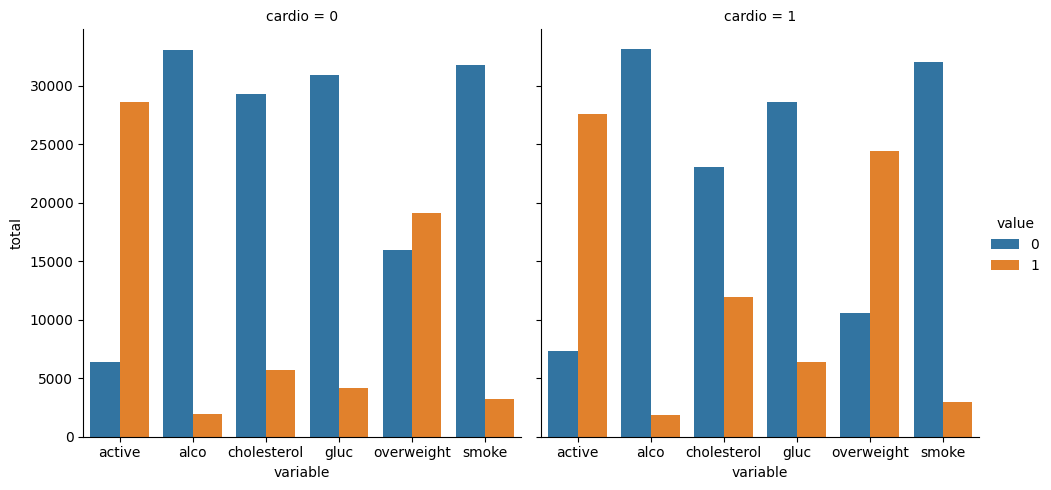

In [32]:
sns.catplot(x='variable', y='total', kind='bar', col='cardio', hue='value', data=r)

In [39]:
df2.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [40]:
df3 = df2[(df2['ap_lo'] <= df2['ap_hi'])]

In [52]:
# height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
# height is more than the 97.5th percentile
# weight is less than the 2.5th percentile
# weight is more than the 97.5th percentile
df4 = df3[(df3['height'] >= df3['height'].quantile(0.025))]  # 67260 rows × 14 columns
df5 = df4[(df4['height'] <= df4['height'].quantile(0.975))]  # 65859 rows × 14 columns
df6 = df5[(df5['weight'] >= df5['weight'].quantile(0.025))]  # 64384 rows × 14 columns
df7 = df6[(df6['height'] <= df6['height'].quantile(0.975))]  # 63116 rows × 14 columns

In [55]:
df7.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


<Axes: >

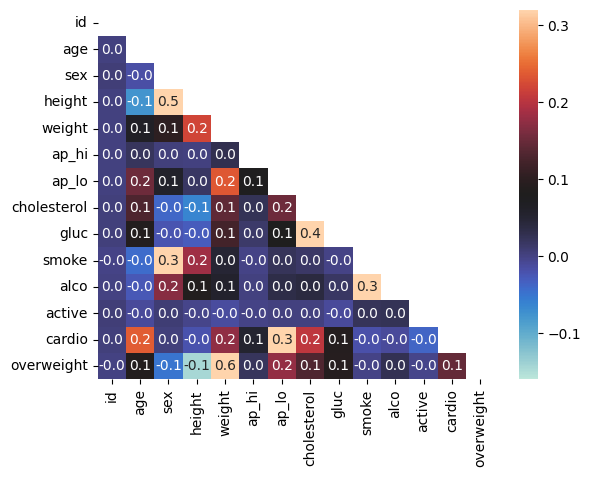

In [98]:
matrix = np.triu(df7.corr())
#sns.heatmap(df7.corr(), annot = True, fmt='.1g', vmin=-0.16, vmax=0.32, center=0.08, mask=matrix)
sns.heatmap(df7.corr(), fmt=".1f", annot = True, vmin=-0.16, vmax=0.32, center=0.08, mask=matrix)